# Выполнил студент группы БСТ2002 Демидов Константин Сергеевич

## Лабораторная работа №6. Сетевые алгоритмы. Динамические алгоритмы поиска путей.

## Необходимо реализовать алгоритм Беллмана-Форда, предусмотреть задание графа в виде матрицы смежности/идентичности, а также разработать графический интерфейс с визуализацией графа

In [ ]:
import math
import copy
import random
from pyvis_network import Network
import networkx as nx


def generate_matrix():
    size = random.randint(30, 100)
    matrix = [[math.inf for i in range(size)] for j in range(size)]
    for i in range(size):
        for j in range(size):
            if random.randint(0, 3) == 3 and i != j:
                rand_count = random.randint(1, 20)
                matrix[i][j] = rand_count
    return matrix

options = """var options = {
  "edges": {
    "arrows": {
      "to": {
        "enabled": true
      }
    },
    "color": {
      "inherit": true
    },
    "smooth": false
  },
  "interaction": {
    "navigationButtons": true
  },
  "physics": {
    "minVelocity": 0.75
  }
}
"""

def create_graph(matrix : list) -> nx.DiGraph:
    graph = nx.DiGraph()
    for i in range(1, len(matrix)):
        graph.add_node(i)
    for i in range(len(matrix)):
        for j in range(len(matrix)):
            if matrix[i][j] != math.inf and i != j:
                graph.add_edge(i + 1, j + 1, weight=matrix[i][j], label=matrix[i][j])
    for edge in graph.edges():
        graph.edges[edge]['color'] = 'blue'
    return graph


# Алгоритм Беллмана-Форда
with open("D:/Univer/pythonProject/inputs.txt", "r", encoding="utf-8") as file:
    matrix = [[int(num) for num in line.split(" ")] for line in file]
    for i in range(len(matrix)):
        for j in range(len(matrix)):
            if matrix[i][j] == 0:
                matrix[i][j] = math.inf

graph = create_graph(matrix)

def bell_ford(matrix, v, u):
    v -= 1
    u -= 1
    N = len(matrix)
    cycle = False
    A = [[math.inf for i in range(N)] for j in range(N)]
    P = [[v] for i in range(N)]
    A[0][v] = 0
    for k in range(1, N):
        A[k] = copy.deepcopy(A[k - 1])
        for i in range(N):
            for j in range(N):
                if matrix[i][j] == math.inf:
                    continue
                if A[k][j] > A[k - 1][i] + matrix[i][j]:
                    A[k][j] = A[k - 1][i] + matrix[i][j]
                    P[j] = copy.deepcopy(P[i])
                    P[j].append(j)
    if A[-1] != A[-2]:
        cycle = True
    if A[-1][u] == math.inf or len(P[u]) == 1:
        path = []
    else:
        path = [el + 1 for el in P[u]]
    return (A[-1], path, P, cycle)

result = bell_ford(matrix, 1, 6)
path = result[1]


graph1 = copy.deepcopy(graph)
if len(path) > 0:
    for i in range(1, len(path)):
        graph1.nodes[path[i - 1]]['color'] = 'red'
        graph1.edges[path[i - 1], path[i]]['color'] = 'red'
    graph1.nodes[path[-1]]['color'] = 'red'


nt1 = Network(notebook=True)
nt1.set_options(options)
nt1.from_nx(graph1)
nt1.show("C:/Users/kostg/OneDrive/Рабочий стол/test1.html")

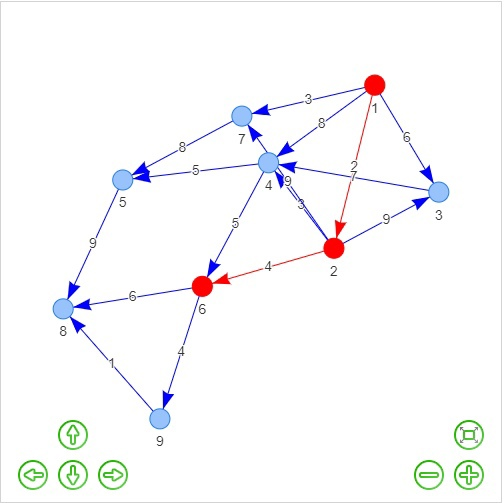

In [6]:
from IPython.display import Image
Image(filename="D:/Univer/bford.jpg", width=400, height=400)